# Hexxed Graph Environment

In [14]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from neuronav.agents.dyna_agents import DynaQ
from neuronav.agents.td_agents import SARSA, TDQ
from neuronav.envs.graph_env import GraphEnv, GraphObservation
from neuronav.envs.graph_templates import GraphTemplate, HexxedGraph
from neuronav.utils import run_episode

In [47]:
g = HexxedGraph()
g.visualize()
g.edges

                     00
 1  2  3  4  5  6 |  07    <--  Layer 01
 8  9 10 11 12 13 |  14    <--  Layer 02
15 16 17 18 19 20 |  21    <--  Layer 03
22 23 24 25 26 27 |  28    <--  Layer 04
29 30 31 32 33 34 |  35    <--  Layer 05
36 37 38 39 40 41 |  42    <--  Layer 06
                     43


{0: [1, 2, 3, 4, 5, 6],
 1: [13, 8, 9],
 2: [8, 9, 10],
 3: [9, 10, 11],
 4: [10, 11, 12],
 5: [11, 12, 13],
 6: [12, 13, 8, 7],
 7: [],
 8: [20, 15, 16],
 9: [15, 16, 17],
 10: [16, 17, 18],
 11: [17, 18, 19],
 12: [18, 19, 20],
 13: [19, 20, 15, 14],
 14: [],
 15: [27, 22, 23],
 16: [22, 23, 24],
 17: [23, 24, 25],
 18: [24, 25, 26],
 19: [25, 26, 27],
 20: [26, 27, 22, 21],
 21: [],
 22: [34, 29, 30],
 23: [29, 30, 31],
 24: [30, 31, 32],
 25: [31, 32, 33],
 26: [32, 33, 34],
 27: [33, 34, 29, 28],
 28: [],
 29: [41, 36, 37],
 30: [36, 37, 38],
 31: [37, 38, 39],
 32: [38, 39, 40],
 33: [39, 40, 41],
 34: [40, 41, 36, 35],
 35: [],
 36: [43],
 37: [43],
 38: [43],
 39: [43],
 40: [43],
 41: [43, 42],
 42: [],
 43: []}

TDQ Episode 0
	agent_pos=39	|	final_state=43	|	reward=0.0
TDQ Episode 1
	agent_pos=40	|	final_state=43	|	reward=0.0
TDQ Episode 2
	agent_pos=37	|	final_state=43	|	reward=0.0
TDQ Episode 3
	agent_pos=41	|	final_state=43	|	reward=0.0
TDQ Episode 4
	agent_pos=39	|	final_state=43	|	reward=0.0
TDQ Episode 5
	agent_pos=38	|	final_state=43	|	reward=0.0
TDQ Episode 6
	agent_pos=36	|	final_state=43	|	reward=0.0
TDQ Episode 7
	agent_pos=39	|	final_state=43	|	reward=0.0
TDQ Episode 8
	agent_pos=38	|	final_state=43	|	reward=0.0
TDQ Episode 9
	agent_pos=06	|	final_state=7	|	reward=1.0
TDQ Episode 10
	agent_pos=06	|	final_state=7	|	reward=1.0
TDQ Episode 11
	agent_pos=06	|	final_state=7	|	reward=1.0
TDQ Episode 12
	agent_pos=06	|	final_state=7	|	reward=1.0
TDQ Episode 13
	agent_pos=06	|	final_state=7	|	reward=1.0
TDQ Episode 14
	agent_pos=06	|	final_state=7	|	reward=1.0
TDQ Episode 15
	agent_pos=06	|	final_state=7	|	reward=1.0
TDQ Episode 16
	agent_pos=06	|	final_state=7	|	reward=1.0
TDQ Episode 17


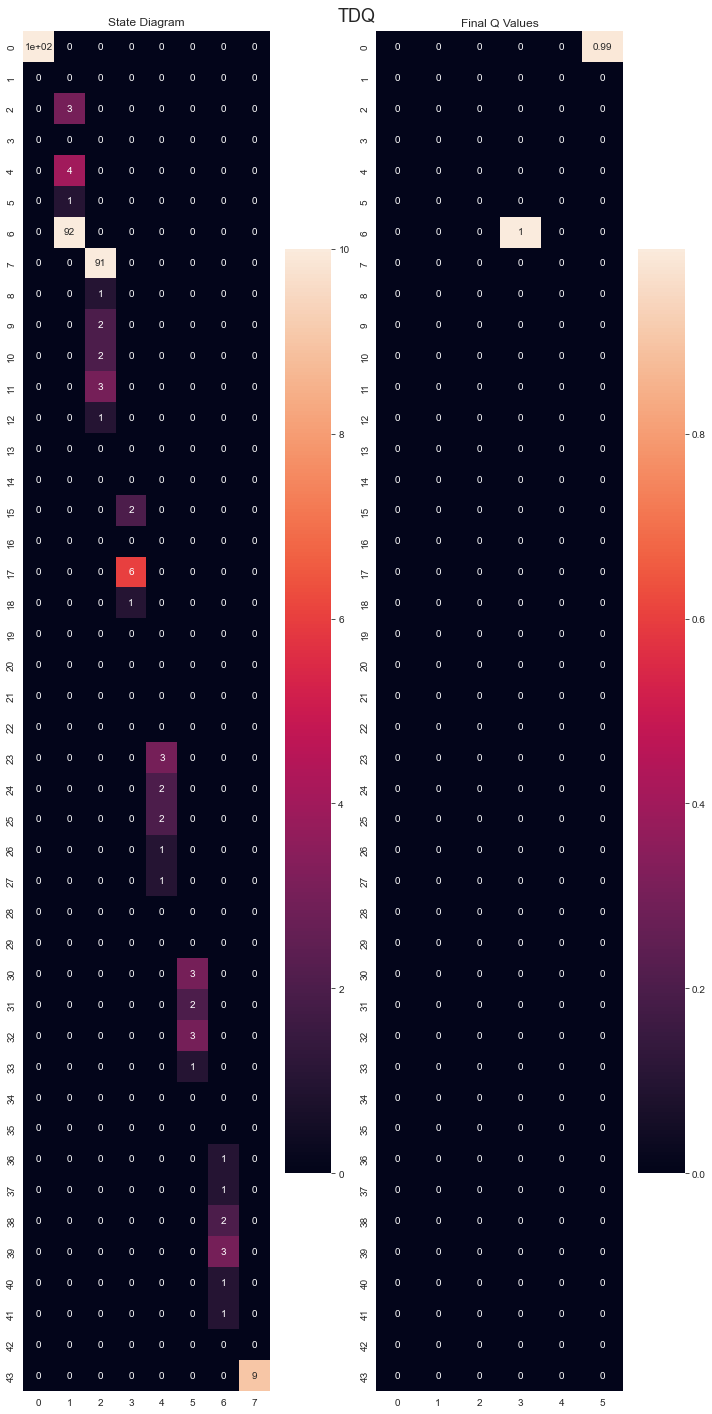

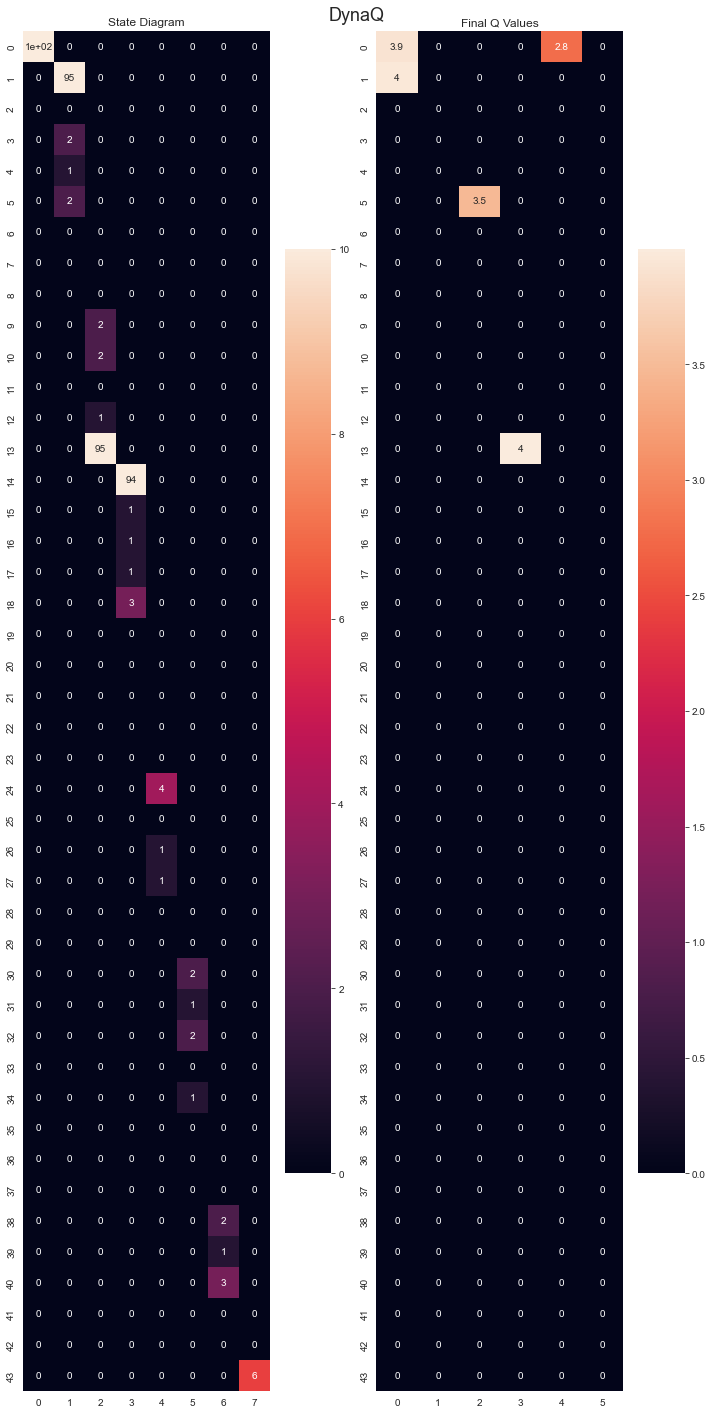

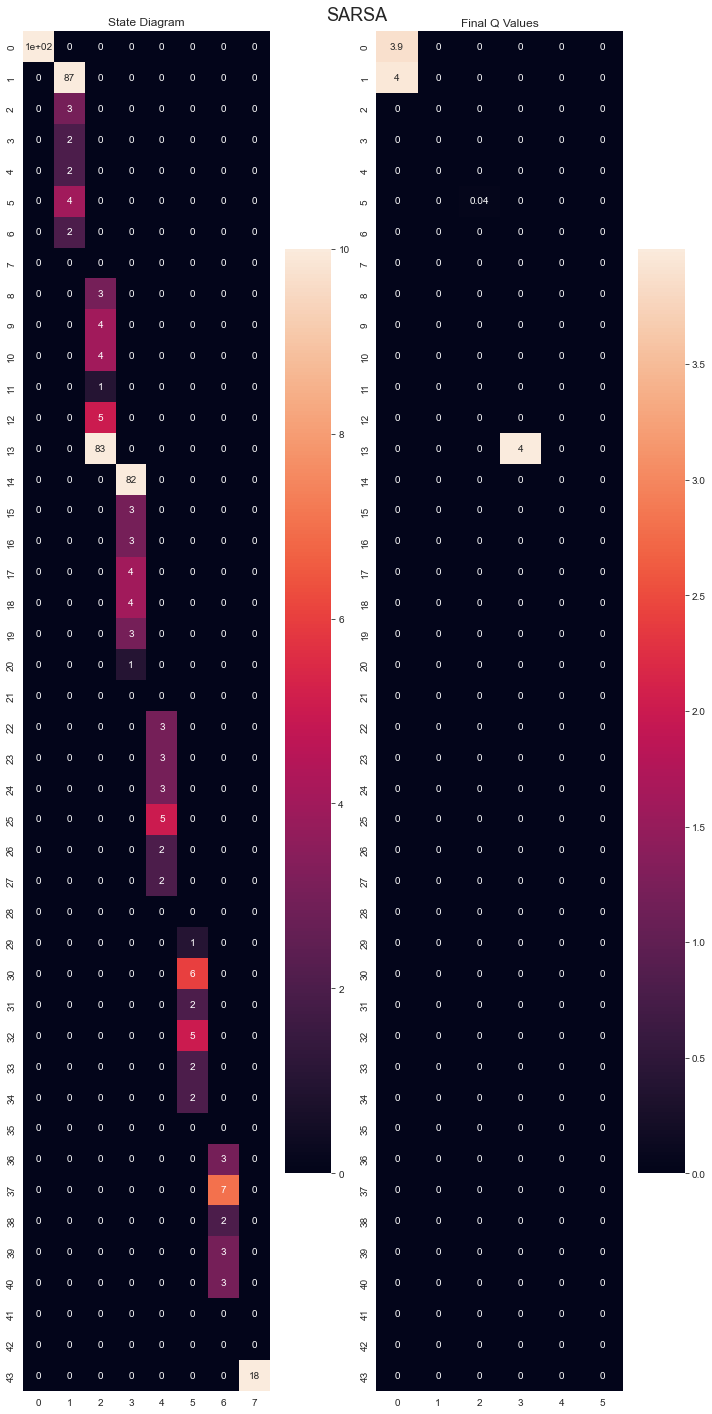

In [49]:
TITLESIZE = 28
AXISSIZE = 20
NUM_EPS = 100
MAX_STEPS = 8
VERSION = 2

env = GraphEnv(GraphTemplate.hexxed,
               obs_type=GraphObservation.index)
obs = env.reset()
# fig, axs = plt.subplots(nrows=NUM_EPS,
# 						ncols=2,
# 						sharey=True,
# 						figsize=(2 * NUM_EPS, 10 * NUM_EPS))

agents = {"TDQ"  : TDQ(env.state_size, env.action_space.n),
		  "DynaQ": DynaQ(env.state_size, env.action_space.n),
          "SARSA": SARSA(env.state_size, env.action_space.n)}

for agent_name in agents.keys():

	agent = agents[agent_name]
	state_diagram = np.zeros((env.state_size, MAX_STEPS))

	for i in range(NUM_EPS):
		print(f"{agent_name} Episode {i}")
		agent, steps, ep_return, moves = run_episode(env=env,
													 agent=agent,
													 max_steps=MAX_STEPS,
													 return_moves=True)

		moves_arr = (np.eye(env.state_size)[moves].T)

		moves_h, moves_w = moves_arr.shape
		state_diagram[: moves_h, : moves_w] += moves_arr

	# Actions plot
	# axs[i, 0].set_title(f"episode {i + 1}. reward={ep_return}, {moves=}", fontsize=TITLESIZE)
	# axs[i, 0].set_xlabel("Time", fontsize=AXISSIZE)
	# axs[i, 0].set_ylabel("Next Node", fontsize=AXISSIZE)
	# sns.heatmap(np.eye(env.state_size)[moves].T,
	# 			ax=axs[i, 0],
	# 			cbar=False)

	# Q-values plot
	# axs[i, 1].set_title("Q-values", fontsize=TITLESIZE)
	# axs[i, 1].set_xlabel("Action Choice (Out-Edge Number)", fontsize=AXISSIZE)
	# axs[i, 1].set_ylabel("Current Node", fontsize=AXISSIZE)
	# sns.heatmap(agent.Q.T,
	# 			annot=True,
	# 			ax=axs[i, 1],
	# 			cbar=True)

# plt.tight_layout()
# plt.show()


	fig, axs = plt.subplots(ncols=2, figsize=(10, 20))

	fig.suptitle(agent_name, fontsize=18)

	axs[0].set_title(f"State Diagram")
	axs[0].set_xlabel("Time")
	axs[0].set_ylabel("Next Node")
	sns.heatmap(state_diagram,
				ax=axs[0], vmax=NUM_EPS // 10,
				annot=True)

	axs[1].set_title(f"Final Q Values")
	axs[1].set_xlabel("Action")
	axs[1].set_ylabel("Node")
	sns.heatmap(agent.Q.T, ax=axs[1], annot=True)

	fig.tight_layout()
	plt.savefig(f"figures/{agent_name}_{NUM_EPS}_v{VERSION}.png", dpi=300)